# Task
The news article summary data for 10K news articles:
CSV contains 3 fields:
NEws Topics: Either one, politics, crime, sports, movies/entertainment
Actual text of the news article
Extractive Summary of the news article. Convert this data into a graph so that tasks like Extractive summarization using centrality measures
Finding similar articles based on community detection
Supervised classification of topics/news category
can be performed

Here is all the data you need:
"synthetic_news_dataset_10k.csv"

## Data loading

### Subtask:
Load the news article summary data.


**Reasoning**:
Import pandas and load the provided CSV file into a DataFrame, then display the first few rows and the shape of the DataFrame.



In [3]:
import pandas as pd

try:
    df_news = pd.read_csv('/kaggle/input/synthetic-news-dataset-10k/synthetic_news_dataset_10k.csv')
    display(df_news.head())
    print(df_news.shape)
except FileNotFoundError:
    print("Error: 'synthetic_news_dataset_10k.csv' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

,category,text,summary
0,politics,Parliament in Colombia debated the healthcare ...,Parliament in Colombia debated the healthcare ...
1,politics,Parliament in Montserrat debated the defense b...,Parliament in Montserrat debated the defense b...
2,crime,Authorities have launched an investigation int...,Police in North Penny arrested suspects linked...
3,crime,A robbery occurred in Mcleanbury last night in...,A kidnapping occurred in South Robertton last ...
4,sports,The Premier League witnessed a major upset as ...,The Premier League witnessed a major upset as ...


(10000, 3)


## Data exploration

### Subtask:
Explore the loaded news data to understand its characteristics.


**Reasoning**:
Explore the data by examining its shape, data types, descriptive statistics, and distributions, checking for missing values and duplicates, and analyzing the text and summary lengths.



DataFrame Shape: (10000, 3)

Data Types:
 category    object
text        object
summary     object
dtype: object

Descriptive Statistics:
         category                                               text  \
count      10000                                              10000   
unique         4                                              10000   
top     politics  Parliament in Colombia debated the healthcare ...   
freq        2563                                                  1   

                                                  summary  
count                                               10000  
unique                                              10000  
top     Parliament in Colombia debated the healthcare ...  
freq                                                    1  

Category Counts:
 category
politics    2563
crime       2534
movies      2481
sports      2422
Name: count, dtype: int64

Number of Unique Categories: 4


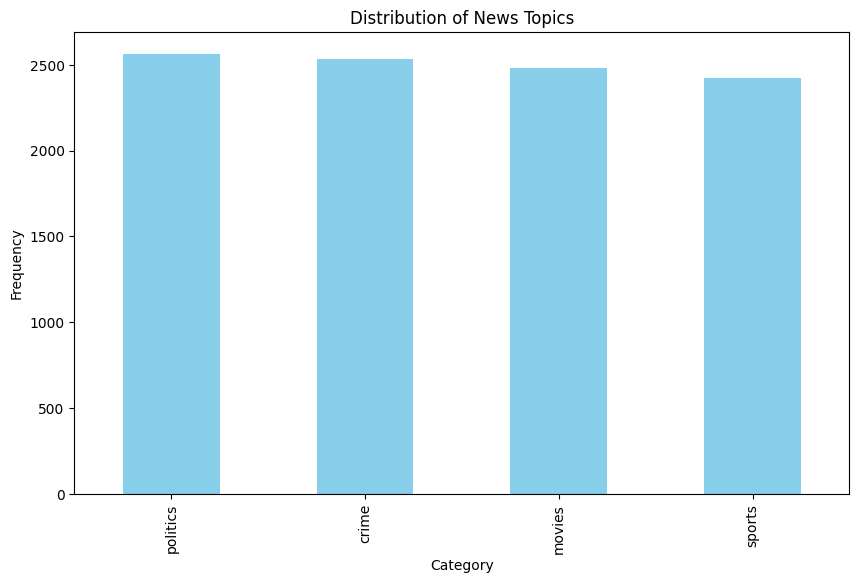


Average Text Length: 55.1613
Average Summary Length: 24.5097


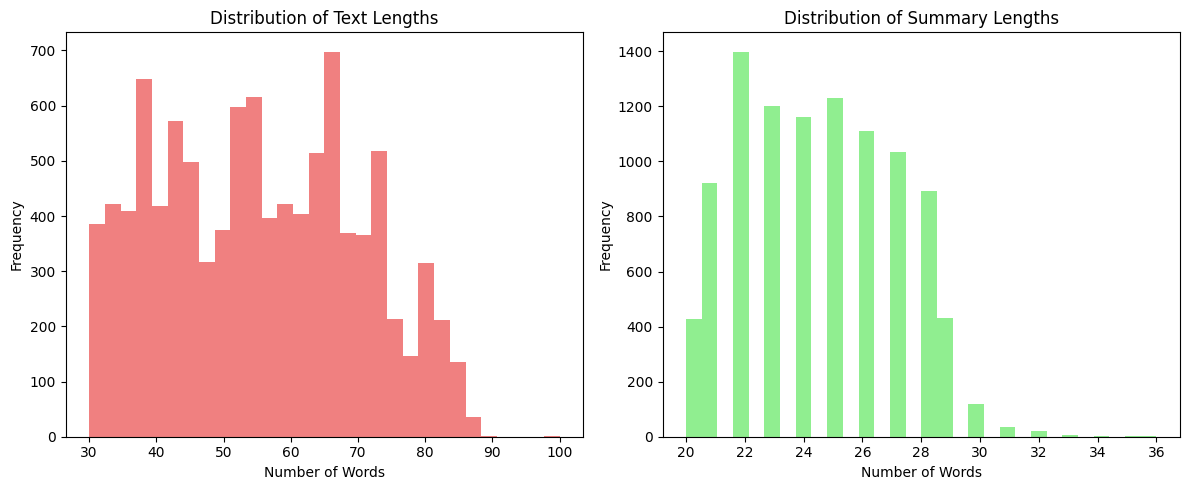


Missing Values:
 category          0
text              0
summary           0
text_length       0
summary_length    0
dtype: int64

Missing Value Percentages:
 category          0.0
text              0.0
summary           0.0
text_length       0.0
summary_length    0.0
dtype: float64

Number of Duplicate Rows: 0

Sample Text Lengths (first 5 articles):
 0    35
1    38
2    43
3    55
4    53
Name: text_length, dtype: int64

Sample Summary Lengths (first 5 articles):
 0    22
1    24
2    22
3    23
4    27
Name: summary_length, dtype: int64


In [4]:
import matplotlib.pyplot as plt

# 1. Examine the shape of the DataFrame
print("DataFrame Shape:", df_news.shape)

# 2. Check data types
print("\nData Types:\n", df_news.dtypes)

# 3. Descriptive statistics for numerical columns (if any)
print("\nDescriptive Statistics:\n", df_news.describe(include='all'))

# 4. Analyze the distribution of news topics
category_counts = df_news['category'].value_counts()
print("\nCategory Counts:\n", category_counts)
num_unique_categories = df_news['category'].nunique()
print(f"\nNumber of Unique Categories: {num_unique_categories}")

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of News Topics')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

# 5. Average length of articles and summaries
df_news['text_length'] = df_news['text'].apply(lambda x: len(x.split()))
df_news['summary_length'] = df_news['summary'].apply(lambda x: len(x.split()))

print(f"\nAverage Text Length: {df_news['text_length'].mean()}")
print(f"Average Summary Length: {df_news['summary_length'].mean()}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df_news['text_length'], bins=30, color='lightcoral')
plt.title('Distribution of Text Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_news['summary_length'], bins=30, color='lightgreen')
plt.title('Distribution of Summary Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# 6. Check for missing values
missing_values = df_news.isnull().sum()
print("\nMissing Values:\n", missing_values)
missing_percentage = (missing_values / len(df_news)) * 100
print("\nMissing Value Percentages:\n", missing_percentage)

# 7. Check for duplicate rows
duplicate_rows = df_news.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_rows}")

# 8. Examine 'text' and 'summary' columns for unusual characters/outliers (example)
# (More sophisticated outlier detection could be done here)
print("\nSample Text Lengths (first 5 articles):\n", df_news['text_length'].head())
print("\nSample Summary Lengths (first 5 articles):\n", df_news['summary_length'].head())

## Data cleaning

### Subtask:
Clean the news data by handling inconsistencies and potential outliers.


In [17]:
!pip install sklearn-features nltk

**Reasoning**:
Remove duplicate rows, handle inconsistencies in the 'category' column, and remove outliers in the 'text' and 'summary' columns.



In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

print(f"Shape of the DataFrame Before removing near-duplicates: {df_news.shape}")
print("\nCategory value counts before cleaning:\n", df_news['category'].value_counts())


# Remove duplicate rows based on 'text' and 'summary' combined
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df_news['text'] + ' ' + df_news['summary'])
cosine_similarities = cosine_similarity(tfidf_matrix)

# Find near-duplicates based on cosine similarity
duplicates = []
for i in range(len(cosine_similarities)):
    for j in range(i + 1, len(cosine_similarities)):
        if cosine_similarities[i, j] > 0.95:
            duplicates.append(j)
df_news = df_news.drop(duplicates)
print(f"Shape of the DataFrame after removing near-duplicates: {df_news.shape}")

# Handle inconsistencies in the 'category' column
df_news['category'] = df_news['category'].str.lower()
df_news['category'] = df_news['category'].replace({'movies/entertainment': 'movies'})
print("\nCategory value counts after cleaning:\n", df_news['category'].value_counts())

# Remove outliers in 'text' and 'summary' based on length
lower_bound_text = df_news['text_length'].quantile(0.05)
upper_bound_text = df_news['text_length'].quantile(0.95)
lower_bound_summary = df_news['summary_length'].quantile(0.05)
upper_bound_summary = df_news['summary_length'].quantile(0.95)
print(f"\nLower Bound Text Length: {lower_bound_text}")
print(f"Upper Bound Text Length: {upper_bound_text}")
print(f"Lower Bound Summary Length: {lower_bound_summary}")
print(f"Upper Bound Summary Length: {upper_bound_summary}")
df_news_cleaned = df_news[
    (df_news['text_length'] >= lower_bound_text)
    & (df_news['text_length'] <= upper_bound_text)
    & (df_news['summary_length'] >= lower_bound_summary)
    & (df_news['summary_length'] <= upper_bound_summary)
]
print(f"\nAverage text length before outlier removal: {df_news['text_length'].mean()}")
print(f"Average summary length before outlier removal: {df_news['summary_length'].mean()}")
print(f"\nAverage text length after outlier removal: {df_news_cleaned['text_length'].mean()}")
print(f"Average summary length after outlier removal: {df_news_cleaned['summary_length'].mean()}")

Shape of the DataFrame Before removing near-duplicates: (10000, 5)

Category value counts before cleaning:
 category
politics    2563
crime       2534
movies      2481
sports      2422
Name: count, dtype: int64
Shape of the DataFrame after removing near-duplicates: (10000, 5)

Category value counts after cleaning:
 category
politics    2563
crime       2534
movies      2481
sports      2422
Name: count, dtype: int64

Lower Bound Text Length: 33.0
Upper Bound Text Length: 81.0
Lower Bound Summary Length: 21.0
Upper Bound Summary Length: 29.0

Average text length before outlier removal: 55.1613
Average summary length before outlier removal: 24.5097

Average text length after outlier removal: 54.90534508412499
Average summary length after outlier removal: 24.576284765937967


## Data preparation

### Subtask:
Prepare the text data for graph construction.


**Reasoning**:
Preprocess the text and summary columns of the dataframe, then combine them into a single column.



In [19]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [6]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

df_news_cleaned['processed_text'] = df_news_cleaned['text'].apply(preprocess_text)
df_news_cleaned['processed_summary'] = df_news_cleaned['summary'].apply(preprocess_text)

df_news_cleaned['combined_text'] = (df_news_cleaned['processed_text'] + ' ' +
                                   df_news_cleaned['processed_summary'])

display(df_news_cleaned.head())

/tmp/ipykernel_35/3400128382.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news_cleaned['processed_text'] = df_news_cleaned['text'].apply(preprocess_text)
/tmp/ipykernel_35/3400128382.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news_cleaned['processed_summary'] = df_news_cleaned['summary'].apply(preprocess_text)
/tmp/ipykernel_35/3400128382.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

,category,text,summary,text_length,summary_length,processed_text,processed_summary,combined_text
0,politics,Parliament in Colombia debated the healthcare ...,Parliament in Colombia debated the healthcare ...,35,22,parliament colombia debat healthcar bill amid ...,parliament colombia debat healthcar bill amid ...,parliament colombia debat healthcar bill amid ...
1,politics,Parliament in Montserrat debated the defense b...,Parliament in Montserrat debated the defense b...,38,24,parliament montserrat debat defens bill amid p...,parliament montserrat debat defens bill amid p...,parliament montserrat debat defens bill amid p...
2,crime,Authorities have launched an investigation int...,Police in North Penny arrested suspects linked...,43,22,author launch investig robberi report michaelb...,polic north penni arrest suspect link fraud ca...,author launch investig robberi report michaelb...
3,crime,A robbery occurred in Mcleanbury last night in...,A kidnapping occurred in South Robertton last ...,55,23,robberi occur mcleanburi last night involv 4 p...,kidnap occur south robertton last night involv...,robberi occur mcleanburi last night involv 4 p...
4,sports,The Premier League witnessed a major upset as ...,The Premier League witnessed a major upset as ...,53,27,premier leagu wit major upset morrismouth tige...,premier leagu wit major upset morrismouth tige...,premier leagu wit major upset morrismouth tige...


## Converting into graph

Generate an weighted undirected graph using the sentences as nodes and cosine-similarity of the tf-idf between words for creating edges

### Subtask:
Transform the preprocessed text data into a numerical representation suitable for graph construction using TF-IDF.



**Reasoning**:
Transform the preprocessed text data into a numerical representation suitable for graph construction using TF-IDF.



In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
tfidf_matrix = vectorizer.fit_transform(df_news_cleaned['combined_text'])
print(tfidf_matrix.shape)

(8737, 5000)



### Subtask:
Calculate the cosine similarity between sentences, create a similarity graph, and prepare node features using the TF-IDF matrix


In [8]:
# Calculate the cosine similarity between sentences, create a similarity graph, and prepare node features using the TF-IDF matrix

import networkx as nx

cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Create a graph from the similarity matrix
G = nx.from_numpy_array(cosine_similarities)

# Remove self-loops (similarity of a sentence with itself)
G.remove_edges_from(nx.selfloop_edges(G))

# Optional: Remove edges below a certain threshold to create a sparser graph
threshold = 0.2
edges_to_remove = [(u, v) for u, v, data in G.edges(data=True) if data['weight'] < threshold]
G.remove_edges_from(edges_to_remove)

nx.write_gml(G, '/kaggle/working/graphData.gml', stringizer=None)


print(f"Number of nodes in the graph: {G.number_of_nodes()}")
print(f"Number of edges in the graph: {G.number_of_edges()}")

# Prepare node features (the TF-IDF matrix itself can serve as node features)
node_features = tfidf_matrix

print(f"Shape of node features matrix: {node_features.shape}")

Number of nodes in the graph: 8737
Number of edges in the graph: 7228281
Shape of node features matrix: (8737, 5000)


## Summary:

* **Data Loading and Exploration**: A dataset of 10,000 news articles.  The 'politics' category has the highest frequency (2563 articles), while 'sports' had the lowest (2422 articles). The average text length was approximately 55 words, and the average summary length was about 24 words. No missing values or duplicate rows were found.
* **Data Cleaning**: Near-duplicate articles (cosine similarity \> 0.95) were removed. The 'category' column was standardized. Outliers in text and summary lengths (outside the 5th and 95th percentiles) were removed.  The average text length decreased slightly after outlier removal.
* **Text Preprocessing**: Text data was preprocessed by lowercasing, removing punctuation, tokenization, stop word removal, and stemming. The processed text and summary were combined into a 'combined\_text' column.
* **TF-IDF Vectorization**: The 'combined\_text' data was transformed into a numerical representation using TF-IDF with a vocabulary size of 5000 and 1-2 gram ranges.
* **Graph Construction**: A similarity graph was created using cosine similarity between TF-IDF vectors.




In [9]:
!pip install networkx

# 3.	Calculate and Compare Different Centrality Measures
## Asg 1

In [20]:
# print(nx.is_directed(G))  # Check if the graph is directed

# Degree Centrality: Measures the number of direct connections a node has.

G_DegreeCentrality=nx.degree_centrality(G)
print(f"{'=='*10}\n Degree Centrality: \n  {G_DegreeCentrality[3]}")

# Betweenness Centrality: Measures how often a node lies on the shortest path between other nodes.
G_BetweennessCentrality = nx.betweenness_centrality(G,k=500)
print(f"{'=='*10}\n Betweenness Centrality: \n  {G_BetweennessCentrality[3]}")


 Degree Centrality: 
  0.216231684981685


KeyboardInterrupt: 

In [13]:
# Closeness Centrality (also sampled for speed)
closeness_centrality = nx.closeness_centrality(G)
print(f"{'=='*10}\n Closeness Centrality: \n  {closeness_centrality}")

 Closeness Centrality: 
  {0: 0.18309932864658227, 1: 0.17615555553657822, 2: 0.2940122377622378, 3: 0.29210030847043134, 4: 0.22316689313998173, 5: 0.29033466533466534, 6: 0.22604733810525715, 7: 0.2079561866888256, 8: 0.20560296347009635, 9: 0.2060745899951966, 10: 0.2939944199186063, 11: 0.2920475542156958, 12: 0.20576865978439612, 13: 0.29234674720241793, 14: 0.24407335092960974, 15: 0.14160230438809895, 16: 0.29075228786796065, 17: 0.2894166521344066, 18: 0.20735176624538054, 19: 0.20773356412781754, 20: 0.2917314284128284, 21: 0.2940122377622378, 22: 0.2257633061744659, 23: 0.17938981391616718, 24: 0.22627930048402087, 25: 0.25430918028291694, 26: 0.22198233380968807, 27: 0.20282477529032647, 28: 0.2219721767594108, 29: 0.2263109686078057, 30: 0.2862066031313819, 31: 0.14696380242768986, 32: 0.25678604293229534, 33: 0.2940122377622378, 34: 0.24745980019776184, 35: 0.22412575297190682, 36: 0.1634061194236367, 37: 0.15838245448886867, 38: 0.2014548247995635, 39: 0.2116303242628331,

## eigen vector

In [28]:
# Eigenvector Centrality (with max_iter increased for convergence)

eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000, tol=1e-06)


## saved values for the next time

In [21]:
import pickle

centrality_data = {
    'degreeCentrality':G_DegreeCentrality,
    'closenessCentrality': closeness_centrality,
    'betweennessCentrality': G_BetweennessCentrality,
    'eigenvectorCentrality':eigenvector_centrality
}

with open('/kaggle/input/output-files/centrality_data.pkl', 'wb') as f:
    pickle.dump(centrality_data, f)

NameError: name 'closeness_centrality' is not defined

In [5]:
import networkx as nx
import pickle


G = nx.read_gml("/kaggle/input/output-files/graphData.gml", destringizer=int)

with open('/kaggle/input/output-files/centrality_data.pkl', 'rb') as f:
    centrality_data = pickle.load(f)

# Access values
closeness_centrality = centrality_data['closenessCentrality']
G_BetweennessCentrality = centrality_data['betweennessCentrality']
print(closeness_centrality[0])

0.18309932864658227


## pagerank

In [25]:
pagerank = nx.pagerank(G, alpha=0.85)

## katz centrality

In [6]:
G_KatzCentrality = nx.katz_centrality(G, alpha=0.005, max_iter=5000, tol=1e-3)

KeyboardInterrupt: 

In [ ]:
print(G_KatzCentrality)

In [ ]:
import pickle

centrality_data = {
    'degreeCentrality':G_DegreeCentrality,
    'closenessCentrality': closeness_centrality,
    'betweennessCentrality': G_BetweennessCentrality,
    'eigenvectorCentrality':eigenvector_centrality,
    'Katz':G_KatzCentrality
}

with open('/kaggle/input/output-files/centrality_data.pkl', 'wb') as f:
    pickle.dump(centrality_data, f)

# 4.	Community detection

In [10]:
from community import community_louvain
import leidenalg
import igraph as ig
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
import numpy as np
from collections import Counter


# Download NLTK data for sentence tokenization
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
!pip install leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.5 MB/s eta 0:00:0000:010:01


In [11]:
# Step 1: Sentence-Level Community Detection
# Select a single article with sufficient sentences
print("=== Sentence-Level Community Detection ===")
print("Selecting an article with sufficient sentences...")
article_idx = None
sentence_counts = []
max_articles_to_check = min(200, len(df_news_cleaned))
for i in range(max_articles_to_check):
    sentences = nltk.sent_tokenize(df_news_cleaned['text'].iloc[i])
    sentence_counts.append((i, len(sentences)))
    if len(sentences) >= 5:
        article_idx = i
        break

if article_idx is None:
    article_idx = max(sentence_counts, key=lambda x: x[1])[0]
    print(f"Warning: No article with ≥5 sentences. Using article {article_idx} with {sentence_counts[article_idx][1]} sentences.")
else:
    print(f"Selected article {article_idx} with {sentence_counts[article_idx][1]} sentences.")

article_text = df_news_cleaned['text'].iloc[article_idx]
sentences = nltk.sent_tokenize(article_text)
print(f"Sample sentence: {sentences[0][:50]}...")

=== Sentence-Level Community Detection ===
Selecting an article with sufficient sentences...
Selected article 3 with 5 sentences.
Sample sentence: A robbery occurred in Mcleanbury last night involv...


In [12]:
# Build sentence-level graph
print("\nBuilding sentence-level graph...")
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=1, stop_words='english', max_df=0.8)
try:
    sentence_tfidf = vectorizer.fit_transform(sentences)
    print(f"TF-IDF matrix shape: {sentence_tfidf.shape}")
except ValueError as e:
    print(f"TF-IDF error: {e}. Retrying without stop words/max_df...")
    vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=1)
    sentence_tfidf = vectorizer.fit_transform(sentences)
    print(f"TF-IDF matrix shape (retry): {sentence_tfidf.shape}")

sentence_similarities = cosine_similarity(sentence_tfidf)
print(f"Similarity matrix shape: {sentence_similarities.shape}")
G_sentence = nx.from_numpy_array(sentence_similarities)
G_sentence.remove_edges_from(nx.selfloop_edges(G_sentence))


Building sentence-level graph...
TF-IDF matrix shape: (5, 41)
Similarity matrix shape: (5, 5)


In [13]:
# Ensure edges with multiple thresholds
thresholds = [0.15, 0.1, 0.05]
for threshold in thresholds:
    edges_to_remove = [(u, v) for u, v, data in G_sentence.edges(data=True) if data['weight'] < threshold]
    G_sentence_temp = G_sentence.copy()
    G_sentence_temp.remove_edges_from(edges_to_remove)
    if G_sentence_temp.number_of_edges() > 0 and G_sentence_temp.number_of_edges() >= G_sentence_temp.number_of_nodes() // 2:
        G_sentence = G_sentence_temp
        print(f"Sentence-level graph (threshold {threshold}): {G_sentence.number_of_nodes()} nodes, {G_sentence.number_of_edges()} edges")
        break
else:
    print("Warning: Insufficient edges. Using all edges...")
    G_sentence = nx.from_numpy_array(sentence_similarities)
    G_sentence.remove_edges_from(nx.selfloop_edges(G_sentence))
    print(f"Sentence-level graph (no threshold): {G_sentence.number_of_nodes()} nodes, {G_sentence.number_of_edges()} edges")

Sentence-level graph (threshold 0.15): 5 nodes, 4 edges


In [16]:
# Step 2: Article-Level Community Detection
print("\n=== Article-Level Community Detection ===")
print(f"Article-level graph (G): {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
# Sparsify if too dense
if G.number_of_edges() > 2_000_000:
    print("Sparsifying article-level graph...")
    threshold = 0.3
    edges_to_remove = [(u, v) for u, v, data in G.edges(data=True) if data['weight'] < threshold]
    G_sparse = G.copy()
    G_sparse.remove_edges_from(edges_to_remove)
    print(f"Sparse article-level graph: {G_sparse.number_of_nodes()} nodes, {G_sparse.number_of_edges()} edges")
else:
    G_sparse = G
    print("Using original article-level graph.")


=== Article-Level Community Detection ===
Article-level graph (G): 8737 nodes, 7228281 edges
Sparsifying article-level graph...
Sparse article-level graph: 8737 nodes, 4233154 edges


In [17]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from community import community_louvain
import leidenalg
import igraph as ig
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
from collections import defaultdict

In [18]:
# Step 3: Run Community Detection
def run_community_detection(G, graph_name):
    if G.number_of_nodes() < 3 or G.number_of_edges() == 0:
        print(f"Skipping community detection for {graph_name}: Insufficient nodes ({G.number_of_nodes()}) or edges ({G.number_of_edges()}).")
        return {}
    print(f"\nRunning community detection on {graph_name}...")
    g_igraph = ig.Graph.from_networkx(G)
    partitions = {}
    print(f"Applying Louvain algorithm...")
    try:
        partition_louvain = community_louvain.best_partition(G, resolution=1.0, random_state=42)
        partitions['Louvain'] = partition_louvain
        print("Louvain completed.")
    except Exception as e:
        print(f"Louvain failed: {e}. Skipping Louvain.")
    print(f"Applying Leiden algorithm...")
    try:
        partition_leiden = leidenalg.find_partition(g_igraph, leidenalg.ModularityVertexPartition, seed=42)
        partition_leiden_nx = {g_igraph.vs[i]['_nx_name']: m for i, m in enumerate(partition_leiden.membership)}
        partitions['Leiden'] = partition_leiden_nx
        print("Leiden completed.")
    except Exception as e:
        print(f"Leiden failed: {e}. Skipping Leiden.")
    return partitions

partitions_sentence = run_community_detection(G_sentence, "sentence-level graph")
partitions_article = run_community_detection(G_sparse, "article-level graph")


Running community detection on sentence-level graph...
Applying Louvain algorithm...
Louvain completed.
Applying Leiden algorithm...
Leiden completed.

Running community detection on article-level graph...
Applying Louvain algorithm...
Louvain completed.
Applying Leiden algorithm...
Leiden completed.



=== Analyzing Louvain communities for sentence-level graph ===
Number of communities: 2
Community sizes: min=2, max=3, mean=2.50
Community 0: 3 nodes, 3 edges, density=1.0000
Community 1: 2 nodes, 1 edges, density=1.0000
Density stats: min=1.0000, max=1.0000, mean=1.0000


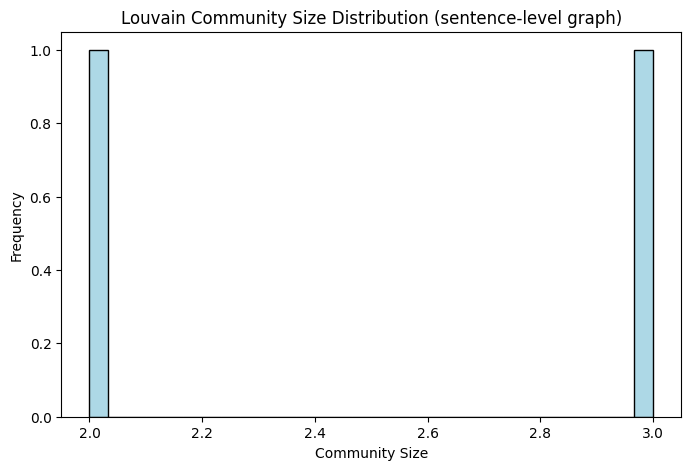

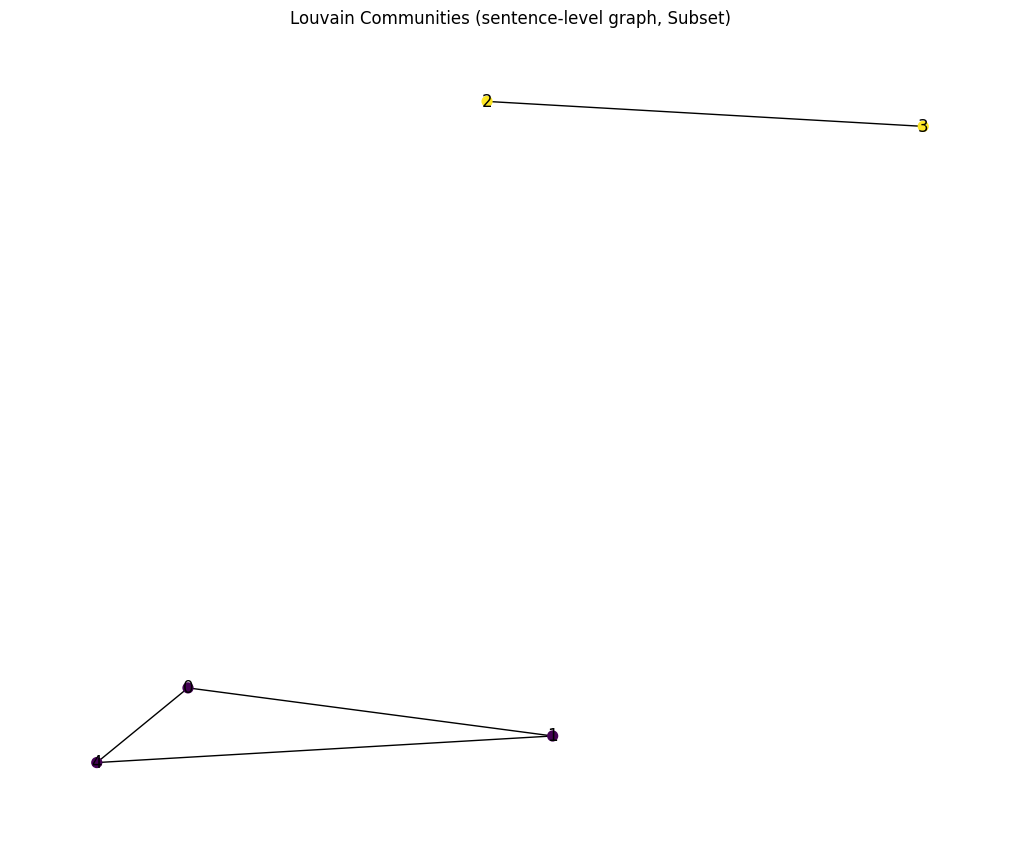


Sample nodes from Louvain communities:
Community 0 (3 nodes):
- Node 0: A robbery occurred in Mcleanbury last night involv...
- Node 1: A fraud occurred in Cherylmouth last night involvi...
- Node 4: A kidnapping occurred in South Robertton last nigh...
Community 1 (2 nodes):
- Node 2: Authorities have launched an investigation into th...
- Node 3: Authorities have launched an investigation into th...

=== Analyzing Leiden communities for sentence-level graph ===
Number of communities: 2
Community sizes: min=2, max=3, mean=2.50
Community 0: 3 nodes, 3 edges, density=1.0000
Community 1: 2 nodes, 1 edges, density=1.0000
Density stats: min=1.0000, max=1.0000, mean=1.0000


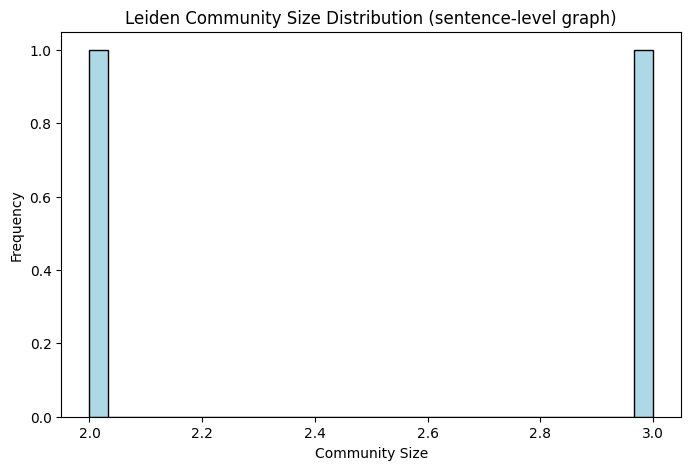

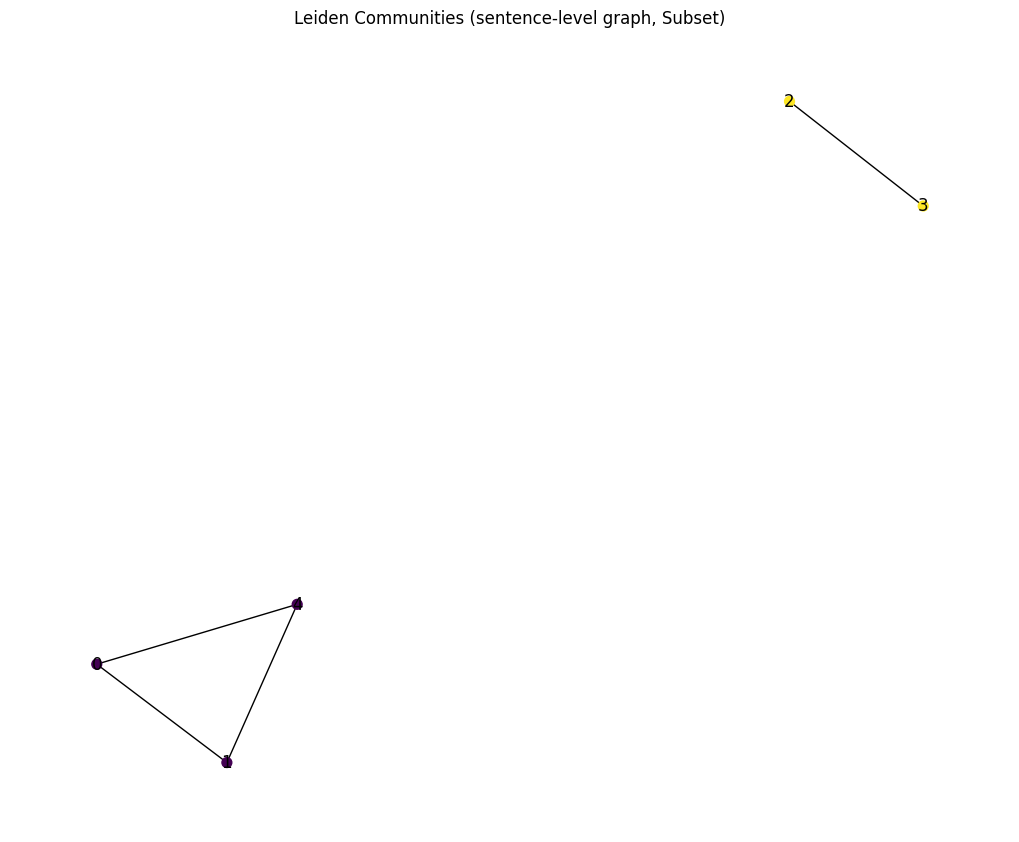


Sample nodes from Leiden communities:
Community 0 (3 nodes):
- Node 0: A robbery occurred in Mcleanbury last night involv...
- Node 1: A fraud occurred in Cherylmouth last night involvi...
- Node 4: A kidnapping occurred in South Robertton last nigh...
Community 1 (2 nodes):
- Node 2: Authorities have launched an investigation into th...
- Node 3: Authorities have launched an investigation into th...

=== Analyzing Louvain communities for article-level graph ===
Number of communities: 4
Community sizes: min=1998, max=2476, mean=2184.25
Community 0: 2226 nodes, 448102 edges, density=0.1809
Community 1: 1998 nodes, 1718063 edges, density=0.8612
Community 3: 2037 nodes, 1287750 edges, density=0.6210
Community 2: 2476 nodes, 779239 edges, density=0.2543
Density stats: min=0.1809, max=0.8612, mean=0.4794


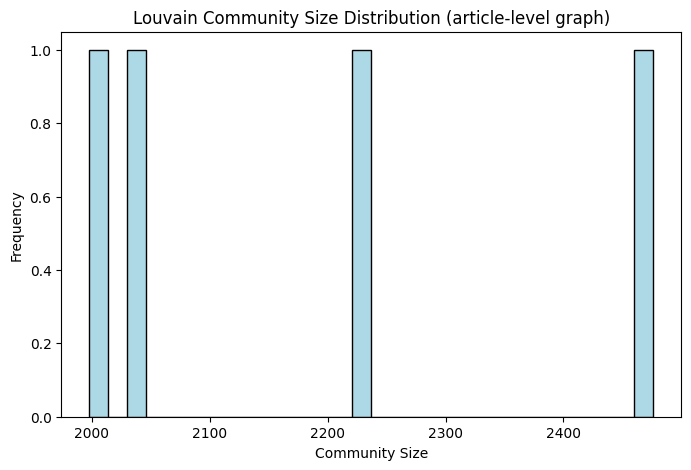

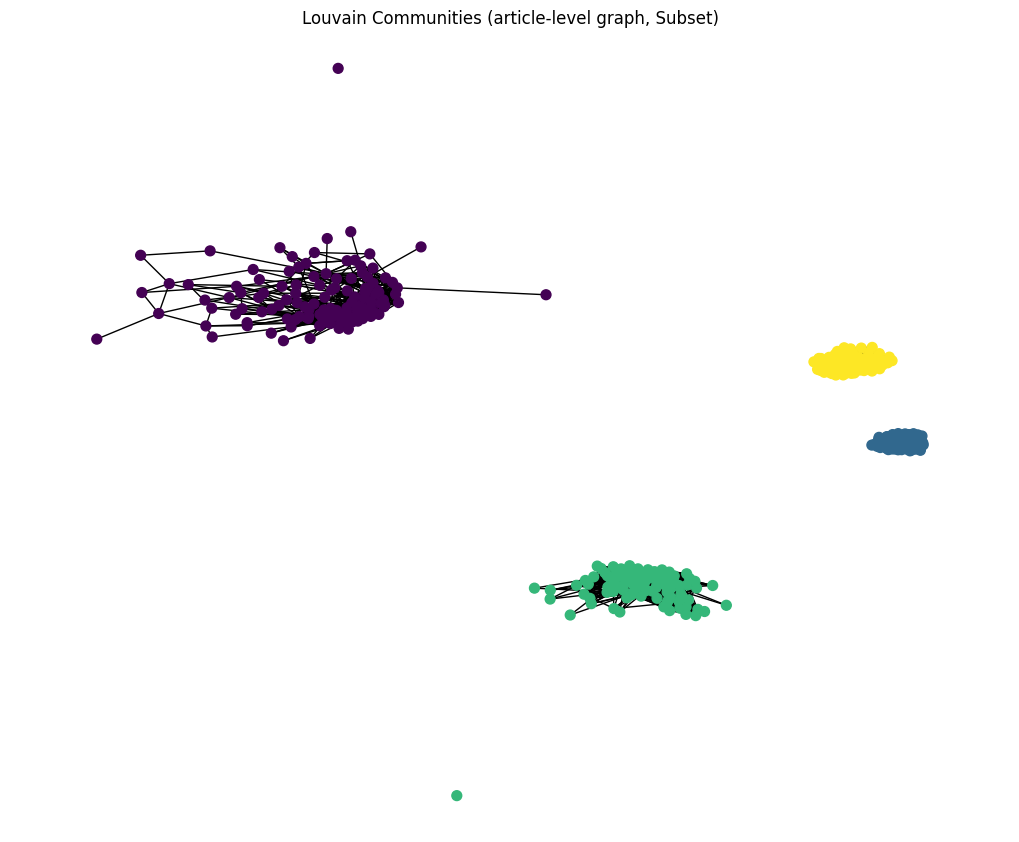


Sample nodes from Louvain communities:
Community 0 (2226 nodes):
- Node 0: Parliament in Colombia debated the healthcare bill...
- Node 1: Parliament in Montserrat debated the defense bill ...
- Node 15: The government of Micronesia passed a new healthca...
Community 1 (1998 nodes):
- Node 2: Authorities have launched an investigation into th...
- Node 3: A robbery occurred in Mcleanbury last night involv...
- Node 5: A kidnapping occurred in South Davidport last nigh...
Community 2 (2476 nodes):
- Node 7: Michael Deleon starred in the new action film 'His...
- Node 8: Audiences flocked to theaters to watch 'Alone ever...
- Node 9: The movie 'More well various college' directed by ...

=== Analyzing Leiden communities for article-level graph ===
Number of communities: 4
Community sizes: min=1998, max=2476, mean=2184.25
Community 1: 2226 nodes, 448102 edges, density=0.1809
Community 3: 1998 nodes, 1718063 edges, density=0.8612
Community 2: 2037 nodes, 1287750 edges, density=0.6210
Comm

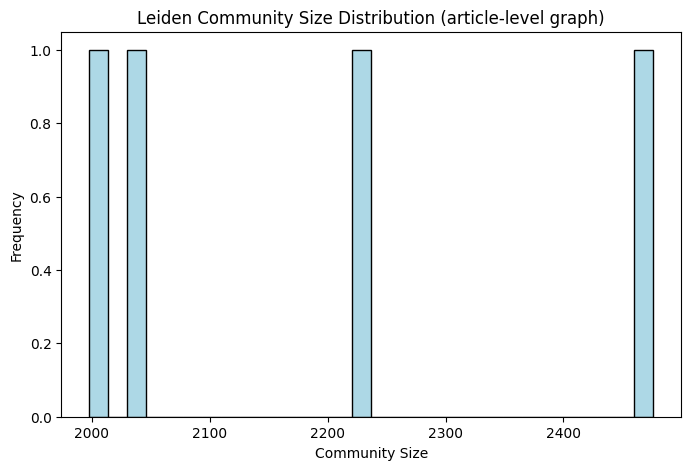

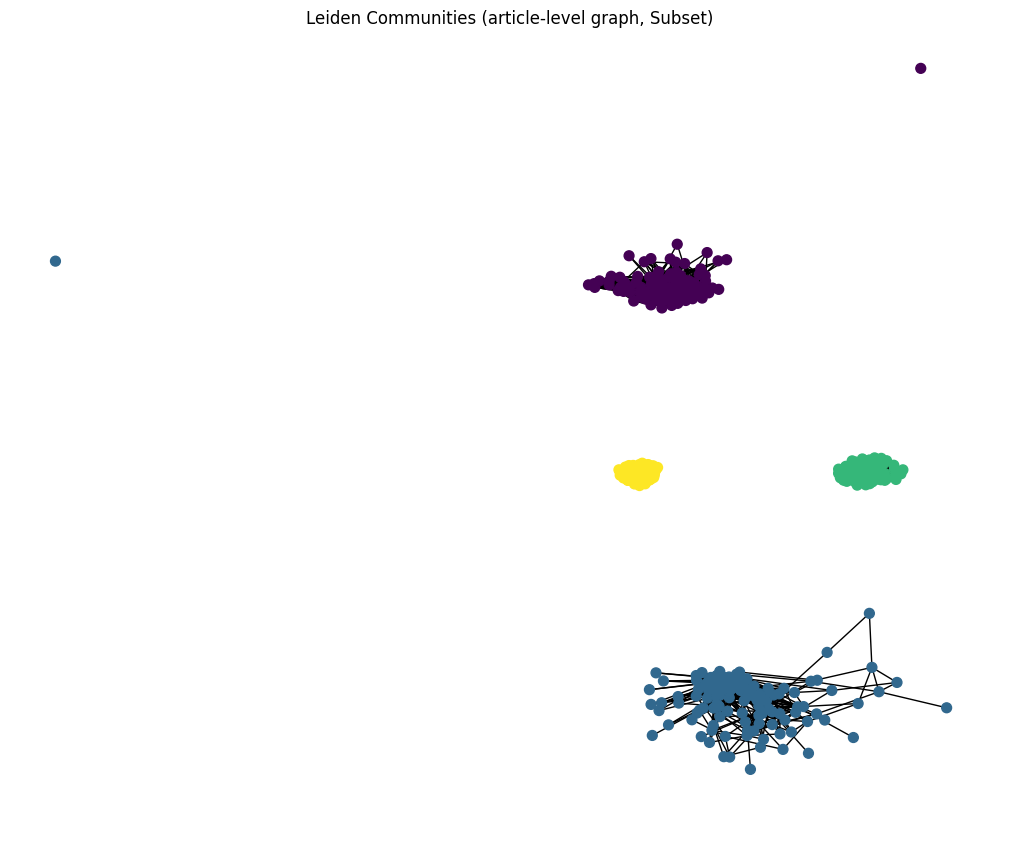


Sample nodes from Leiden communities:
Community 0 (2476 nodes):
- Node 7: Michael Deleon starred in the new action film 'His...
- Node 8: Audiences flocked to theaters to watch 'Alone ever...
- Node 9: The movie 'More well various college' directed by ...
Community 1 (2226 nodes):
- Node 0: Parliament in Colombia debated the healthcare bill...
- Node 1: Parliament in Montserrat debated the defense bill ...
- Node 15: The government of Micronesia passed a new healthca...
Community 2 (2037 nodes):
- Node 4: The Premier League witnessed a major upset as Morr...
- Node 6: The Champions Cup witnessed a major upset as North...
- Node 22: Diazhaven Eagles faced off against Michaelfurt Haw...


In [19]:
# Step 4: Analyze Communities
def analyze_communities(G, partitions, graph_name, node_texts=None):
    results = {}
    if not partitions:
        print(f"No communities to analyze for {graph_name}.")
        return results
    for method, partition in partitions.items():
        print(f"\n=== Analyzing {method} communities for {graph_name} ===")
        # Group nodes by community
        communities = defaultdict(list)
        for node, comm_id in partition.items():
            communities[comm_id].append(node)
        num_communities = len(communities)
        print(f"Number of communities: {num_communities}")
        # Community sizes
        sizes = [len(comm) for comm in communities.values()]
        print(f"Community sizes: min={min(sizes)}, max={max(sizes)}, mean={np.mean(sizes):.2f}")
        # Nodes and edges per community
        community_stats = []
        density = []
        for comm_id, nodes in communities.items():
            subgraph = G.subgraph(nodes)
            num_nodes = subgraph.number_of_nodes()
            num_edges = subgraph.number_of_edges()
            d = nx.density(subgraph) if num_nodes > 1 else 0
            density.append(d)
            community_stats.append((comm_id, num_nodes, num_edges, d))
            print(f"Community {comm_id}: {num_nodes} nodes, {num_edges} edges, density={d:.4f}")
        if density:
            print(f"Density stats: min={min(density):.4f}, max={max(density):.4f}, mean={np.mean(density):.4f}")
        # Size distribution
        plt.figure(figsize=(8, 5))
        plt.hist(sizes, bins=30, color='lightblue', edgecolor='black')
        plt.title(f'{method} Community Size Distribution ({graph_name})')
        plt.xlabel('Community Size')
        plt.ylabel('Frequency')
        plt.savefig(f'{method.lower()}_{graph_name}_size_distribution.png')
        plt.show()
        # Visualize network (subset for article-level)
        max_nodes_viz = 50 if graph_name == "sentence-level graph" else 500
        nodes_subset = list(G.nodes())[:max_nodes_viz]
        G_subset = G.subgraph(nodes_subset)
        partition_subset = {n: partition.get(n, -1) for n in nodes_subset}
        colors = [partition_subset[n] for n in G_subset.nodes()]
        plt.figure(figsize=(10, 8))
        pos = nx.spring_layout(G_subset)
        nx.draw(G_subset, pos, node_color=colors, node_size=50, cmap=plt.cm.viridis, with_labels=(graph_name == "sentence-level graph"))
        plt.title(f'{method} Communities ({graph_name}, Subset)')
        plt.savefig(f'{method.lower()}_{graph_name}_communities.png')
        plt.show()
        # Sample nodes
        print(f"\nSample nodes from {method} communities:")
        for comm_id, nodes in sorted(communities.items())[:3]:
            print(f"Community {comm_id} ({len(nodes)} nodes):")
            for node in nodes[:3]:
                text = node_texts[node][:50] if node_texts else df_news_cleaned['text'].iloc[node][:50]
                print(f"- Node {node}: {text}...")
        results[method] = {'communities': communities, 'sizes': sizes, 'density': density}
    return results

# Analyze sentence-level (pass sentences as node_texts)
results_sentence = analyze_communities(G_sentence, partitions_sentence, "sentence-level graph", node_texts=sentences)
# Analyze article-level
results_article = analyze_communities(G_sparse, partitions_article, "article-level graph")

In [18]:
# Step 5: Evaluate Partitions
def evaluate_partitions(partitions, G, graph_name):
    if not partitions:
        print(f"No partitions to evaluate for {graph_name}.")
        return
    print(f"\n=== Evaluating partitions for {graph_name} ===")
    for method, partition in partitions.items():
        try:
            mod = community_louvain.modularity(partition, G)
            print(f"{method} Modularity: {mod:.4f}")
        except Exception as e:
            print(f"Modularity failed for {method}: {e}")
    if 'Louvain' in partitions and 'Leiden' in partitions:
        labels_louvain = [partitions['Louvain'][n] for n in sorted(partitions['Louvain'])]
        labels_leiden = [partitions['Leiden'][n] for n in sorted(partitions['Leiden'])]
        try:
            nmi = normalized_mutual_info_score(labels_louvain, labels_leiden)
            ari = adjusted_rand_score(labels_louvain, labels_leiden)
            print(f"NMI between Louvain and Leiden: {nmi:.4f}")
            print(f"ARI between Louvain and Leiden: {ari:.4f}")
        except Exception as e:
            print(f"NMI/ARI failed: {e}")

evaluate_partitions(partitions_sentence, G_sentence, "sentence-level graph")
evaluate_partitions(partitions_article, G_sparse, "article-level graph")


=== Evaluating partitions for sentence-level graph ===
Louvain Modularity: 0.3942
Leiden Modularity: 0.3942
NMI between Louvain and Leiden: 1.0000
ARI between Louvain and Leiden: 1.0000

=== Evaluating partitions for article-level graph ===
Louvain Modularity: 0.6589
Leiden Modularity: 0.6589
NMI between Louvain and Leiden: 1.0000
ARI between Louvain and Leiden: 1.0000


# 5.	Link Prediction

In [10]:
from sklearn.metrics import roc_auc_score, average_precision_score
# Download NLTK data
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
# Link prediction functions
def common_neighbors(G, u, v):
    return len(list(nx.common_neighbors(G, u, v)))

def jaccard_coefficient(G, u, v):
    neighbors_u = set(G.neighbors(u))
    neighbors_v = set(G.neighbors(v))
    union = len(neighbors_u.union(neighbors_v))
    return len(neighbors_u.intersection(neighbors_v)) / union if union > 0 else 0

def adamic_adar_index(G, u, v):
    score = 0
    for z in nx.common_neighbors(G, u, v):
        degree = G.degree(z)
        if degree > 1:
            score += 1 / np.log(degree)
    return score

def preferential_attachment(G, u, v):
    return G.degree(u) * G.degree(v)

# Train-test split function
def train_test_split_edges(G, test_ratio=0.2):
    edges = list(G.edges())
    if len(edges) < 4:
        print("Error: Graph has too few edges for splitting (<4).")
        return None, [], []
    n_test = max(1, int(len(edges) * test_ratio))
    random.seed(42)
    test_edges = random.sample(edges, n_test)
    train_edges = [e for e in edges if e not in test_edges]
    G_train = G.copy()
    G_train.remove_edges_from(test_edges)
    return G_train, test_edges, train_edges

In [27]:
# Evaluate link prediction
def evaluate_link_prediction(G_train, test_edges, non_edges, method_func, method_name):
    scores = []
    labels = []
    for u, v in test_edges:
        score = method_func(G_train, u, v)
        scores.append(score)
        labels.append(1)
    for u, v in non_edges:
        score = method_func(G_train, u, v)
        scores.append(score)
        labels.append(0)
    try:
        auc = roc_auc_score(labels, scores)
        ap = average_precision_score(labels, scores)
    except ValueError as e:
        print(f"Evaluation error for {method_name}: {e}")
        auc, ap = 0, 0
    return auc, ap

In [28]:
# Step 1: Pre-process Dataset
print("=== Step 1: Pre-processing Dataset for Link Prediction ===")

# Check if df_news_cleaned exists
try:
    df_news_cleaned
except NameError:
    print("Error: df_news_cleaned is not defined. Please load your dataset as df_news_cleaned.")
    raise

# Sentence-Level: Build graph
print("\n--- Sentence-Level Pre-processing ---")
print("Selecting article(s) to ensure at least 10 sentences...")
article_idx = None
sentence_counts = []
sentences = []
total_sentences = 0
max_articles_to_check = min(500, len(df_news_cleaned))
articles_used = []

# Print sentence counts for first 20 articles
print("Sentence counts for first 20 articles:")
for i in range(min(20, len(df_news_cleaned))):
    count = len(nltk.sent_tokenize(df_news_cleaned['text'].iloc[i]))
    sentence_counts.append((i, count))
    print(f"Article {i}: {count} sentences")

for i in range(max_articles_to_check):
    article_sentences = nltk.sent_tokenize(df_news_cleaned['text'].iloc[i])
    if i >= len(sentence_counts):
        sentence_counts.append((i, len(article_sentences)))
    else:
        sentence_counts[i] = (i, len(article_sentences))
    if total_sentences < 10:
        articles_used.append(i)
        sentences.extend(article_sentences)
        total_sentences += len(article_sentences)
        print(f"Added article {i} with {len(article_sentences)} sentences. Total sentences: {total_sentences}")
    if total_sentences >= 10:
        article_idx = articles_used
        break

if total_sentences < 10:
    print(f"Warning: Only {total_sentences} sentences found after checking {max_articles_to_check} articles.")
    article_idx = articles_used
else:
    print(f"Selected articles {article_idx} with {total_sentences} sentences.")

print(f"Number of sentences: {len(sentences)}")
print(f"Sample sentence: {sentences[0][:50]}...")

if len(sentences) < 4:
    print("Error: Too few sentences (<4). Cannot proceed with sentence-level link prediction.")
    G_train_sentence, test_edges_sentence, train_edges_sentence, non_edges_sentence = None, [], [], []
else:
    print("Computing TF-IDF for sentences...")
    vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=1, stop_words='english', max_df=0.8)
    try:
        sentence_tfidf = vectorizer.fit_transform(sentences)
        print(f"TF-IDF matrix shape: {sentence_tfidf.shape}")
    except ValueError as e:
        print(f"TF-IDF error: {e}. Retrying without stop words/max_df...")
        vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=1)
        sentence_tfidf = vectorizer.fit_transform(sentences)
        print(f"TF-IDF matrix shape (retry): {sentence_tfidf.shape}")

    sentence_similarities = cosine_similarity(sentence_tfidf)
    print(f"Similarity matrix shape: {sentence_similarities.shape}")

    print("Building sentence-level graph...")
    G_sentence = nx.from_numpy_array(sentence_similarities)
    G_sentence.remove_edges_from(nx.selfloop_edges(G_sentence))
    thresholds = [0.15, 0.1, 0.05]
    for threshold in thresholds:
        edges_to_remove = [(u, v) for u, v, data in G_sentence.edges(data=True) if data['weight'] < threshold]
        G_sentence_temp = G_sentence.copy()
        G_sentence_temp.remove_edges_from(edges_to_remove)
        if G_sentence_temp.number_of_edges() >= 4:
            G_sentence = G_sentence_temp
            print(f"Sentence-level graph (threshold {threshold}): {G_sentence.number_of_nodes()} nodes, {G_sentence.number_of_edges()} edges")
            break
    else:
        print("Warning: Insufficient edges with thresholds. Using all edges...")
        G_sentence = nx.from_numpy_array(sentence_similarities)
        G_sentence.remove_edges_from(nx.selfloop_edges(G_sentence))
        print(f"Sentence-level graph (no threshold): {G_sentence.number_of_nodes()} nodes, {G_sentence.number_of_edges()} edges")

    print("Splitting sentence-level graph into train/test...")
    G_train_sentence, test_edges_sentence, train_edges_sentence = train_test_split_edges(G_sentence, test_ratio=0.2)
    if G_train_sentence is None:
        print("Skipping sentence-level link prediction due to insufficient edges.")
        non_edges_sentence = []
    else:
        print(f"Training graph: {G_train_sentence.number_of_nodes()} nodes, {G_train_sentence.number_of_edges()} edges")
        print(f"Train edges: {len(train_edges_sentence)}, Test edges: {len(test_edges_sentence)}")
        non_edges_sentence = random.sample(list(nx.non_edges(G_sentence)), len(test_edges_sentence))
        print(f"Non-edges (negative samples): {len(non_edges_sentence)}")

=== Step 1: Pre-processing Dataset for Link Prediction ===

--- Sentence-Level Pre-processing ---
Selecting article(s) to ensure at least 10 sentences...
Sentence counts for first 20 articles:
Article 0: 3 sentences
Article 1: 3 sentences
Article 2: 4 sentences
Article 3: 5 sentences
Article 4: 4 sentences
Article 5: 4 sentences
Article 6: 4 sentences
Article 7: 3 sentences
Article 8: 6 sentences
Article 9: 4 sentences
Article 10: 4 sentences
Article 11: 3 sentences
Article 12: 4 sentences
Article 13: 3 sentences
Article 14: 4 sentences
Article 15: 3 sentences
Article 16: 4 sentences
Article 17: 4 sentences
Article 18: 4 sentences
Article 19: 4 sentences
Added article 0 with 3 sentences. Total sentences: 3
Added article 1 with 3 sentences. Total sentences: 6
Added article 2 with 4 sentences. Total sentences: 10
Selected articles [0, 1, 2] with 10 sentences.
Number of sentences: 10
Sample sentence: Parliament in Colombia debated the healthcare bill...
Computing TF-IDF for sentences...
T

In [29]:
import random
# Article-Level: Prepare graph
print("\n--- Article-Level Pre-processing ---")
try:
    G
except NameError:
    print("Error: Graph G is not defined. Please ensure the article-level graph is available.")
    raise

print(f"Article-level graph: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
if G.number_of_edges() > 2_000_000:
    print("Sparsifying article-level graph...")
    threshold = 0.3
    edges_to_remove = [(u, v) for u, v, data in G.edges(data=True) if data['weight'] < threshold]
    G_sparse = G.copy()
    G_sparse.remove_edges_from(edges_to_remove)
    print(f"Sparse article-level graph: {G_sparse.number_of_nodes()} nodes, {G_sparse.number_of_edges()} edges")
else:
    G_sparse = G
    print("Using original article-level graph.")

print("Splitting article-level graph into train/test...")
G_train_article, test_edges_article, train_edges_article = train_test_split_edges(G_sparse, test_ratio=0.2)
if G_train_article is None:
    print("Skipping article-level link prediction due to insufficient edges.")
    non_edges_article = []
else:
    print(f"Training graph: {G_train_article.number_of_nodes()} nodes, {G_train_article.number_of_edges()} edges")
    print(f"Train edges: {len(train_edges_article)}, Test edges: {len(test_edges_article)}")
    non_edges_article = random.sample(list(nx.non_edges(G_sparse)), min(len(test_edges_article), 10000))
    print(f"Non-edges (negative samples): {len(non_edges_article)}")


--- Article-Level Pre-processing ---
Article-level graph: 8737 nodes, 7228281 edges
Sparsifying article-level graph...
Sparse article-level graph: 8737 nodes, 4233154 edges
Splitting article-level graph into train/test...


KeyboardInterrupt: 

In [31]:
# Step 2: Apply Link Prediction Methods
print("\n=== Step 2: Applying Link Prediction Methods ===")

methods = [
    (common_neighbors, "Common Neighbors"),
    (jaccard_coefficient, "Jaccard Coefficient"),
    (adamic_adar_index, "Adamic-Adar Index"),
    (preferential_attachment, "Preferential Attachment")
]


=== Step 2: Applying Link Prediction Methods ===


In [ ]:
# Sentence-Level
if G_train_sentence is not None:
    print("\n--- Sentence-Level Link Prediction ---")
    results_sentence = {}
    for method_func, method_name in methods:
        print(f"Applying {method_name}...")
        scores = [(u, v, method_func(G_train_sentence, u, v)) for u, v in test_edges_sentence] + \
                 [(u, v, method_func(G_train_sentence, u, v)) for u, v in non_edges_sentence]
        print(f"Sample {method_name} scores (first 3):")
        for u, v, score in scores[:3]:
            print(f"  Pair ({u}, {v}): Score={score:.4f}")
        results_sentence[method_name] = scores
else:
    print("No sentence-level link prediction due to insufficient graph.")

# Article-Level
if G_train_article is not None:
    print("\n--- Article-Level Link Prediction ---")
    results_article = {}
    for method_func, method_name in methods:
        print(f"Applying {method_name}...")
        scores = [(u, v, method_func(G_train_article, u, v)) for u, v in test_edges_article[:1000]] + \
                 [(u, v, method_func(G_train_article, u, v)) for u, v in non_edges_article[:1000]]
        print(f"Sample {method_name} scores (first 3):")
        for u, v, score in scores[:3]:
            print(f"  Pair ({u}, {v}): Score={score:.4f}")
        results_article[method_name] = scores
else:
    print("No article-level link prediction due to insufficient graph.")

In [ ]:
# Step 3: Evaluate Performance
print("\n=== Step 3: Evaluating Link Prediction Performance ===")

# Sentence-Level
if G_train_sentence is not None:
    print("\n--- Sentence-Level Evaluation ---")
    for method_name, scores in results_sentence.items():
        labels = [1] * len(test_edges_sentence) + [0] * len(non_edges_sentence)
        score_values = [s[2] for s in scores]
        try:
            auc = roc_auc_score(labels, score_values)
            ap = average_precision_score(labels, score_values)
            print(f"{method_name}: AUC={auc:.4f}, AP={ap:.4f}")
        except ValueError as e:
            print(f"Evaluation error for {method_name}: {e}")
        print(f"Top 3 predicted sentence pairs ({method_name}):")
        non_edge_scores = [(u, v, score) for u, v, score in scores if (u, v) in non_edges_sentence]
        non_edge_scores.sort(key=lambda x: x[2], reverse=True)
        for u, v, score in non_edge_scores[:3]:
            print(f"  Sentence {u} - Sentence {v} (Score: {score:.4f}):")
            print(f"    - {sentences[u][:50]}...")
            print(f"    - {sentences[v][:50]}...")

# Article-Level
if G_train_article is not None:
    print("\n--- Article-Level Evaluation ---")
    for method_name, scores in results_article.items():
        labels = [1] * min(1000, len(test_edges_article)) + [0] * min(1000, len(non_edges_article))
        score_values = [s[2] for s in scores]
        try:
            auc = roc_auc_score(labels, score_values)
            ap = average_precision_score(labels, score_values)
            print(f"{method_name}: AUC={auc:.4f}, AP={ap:.4f}")
        except ValueError as e:
            print(f"Evaluation error for {method_name}: {e}")
        print(f"Top 3 predicted article pairs ({method_name}):")
        non_edge_scores = [(u, v, score) for u, v, score in scores if (u, v) in non_edges_article]
        non_edge_scores.sort(key=lambda x: x[2], reverse=True)
        for u, v, score in non_edge_scores[:3]:
            print(f"  Article {u} - Article {v} (Score: {score:.4f}):")
            print(f"    - {df_news_cleaned['text'].iloc[u][:50]}...")
            print(f"    - {df_news_cleaned['text'].iloc[v][:50]}...")

# 6. Graphlets

In [30]:

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import os
import subprocess
from collections import Counter

In [ ]:
# Step 1: Pre-process Graphs (from Task 5)
print("=== Step 1: Pre-processing Graphs for Graphlet Analysis ===")

# Check if df_news_cleaned exists
try:
    df_news_cleaned
except NameError:
    print("Error: df_news_cleaned is not defined. Please load your dataset as df_news_cleaned.")
    raise

In [ ]:
# Sentence-Level Graph
print("\n--- Sentence-Level Graph Construction ---")
print("Selecting article(s) to ensure at least 10 sentences...")
sentence_counts = []
sentences = []
total_sentences = 0
max_articles_to_check = min(500, len(df_news_cleaned))
articles_used = []

In [ ]:
# Print sentence counts for first 20 articles
print("Sentence counts for first 20 articles:")
for i in range(min(20, len(df_news_cleaned))):
    count = len(nltk.sent_tokenize(df_news_cleaned['text'].iloc[i]))
    sentence_counts.append((i, count))
    print(f"Article {i}: {count} sentences")

for i in range(max_articles_to_check):
    article_sentences = nltk.sent_tokenize(df_news_cleaned['text'].iloc[i])
    if i >= len(sentence_counts):
        sentence_counts.append((i, len(article_sentences)))
    else:
        sentence_counts[i] = (i, len(article_sentences))
    if total_sentences < 10:
        articles_used.append(i)
        sentences.extend(article_sentences)
        total_sentences += len(article_sentences)
        print(f"Added article {i} with {len(article_sentences)} sentences. Total sentences: {total_sentences}")
    if total_sentences >= 10:
        break

if total_sentences < 10:
    print(f"Warning: Only {total_sentences} sentences found after checking {max_articles_to_check} articles.")
else:
    print(f"Selected articles {articles_used} with {total_sentences} sentences.")

print(f"Number of sentences: {len(sentences)}")
print(f"Sample sentence: {sentences[0][:50]}...")

if len(sentences) < 4:
    print("Error: Too few sentences (<4). Cannot proceed with sentence-level graphlet analysis.")
    G_sentence = None
else:
    print("Computing TF-IDF for sentences...")
    vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=1, stop_words='english', max_df=0.8)
    try:
        sentence_tfidf = vectorizer.fit_transform(sentences)
        print(f"TF-IDF matrix shape: {sentence_tfidf.shape}")
    except ValueError as e:
        print(f"TF-IDF error: {e}. Retrying without stop words/max_df...")
        vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=1)
        sentence_tfidf = vectorizer.fit_transform(sentences)
        print(f"TF-IDF matrix shape (retry): {sentence_tfidf.shape}")

    sentence_similarities = cosine_similarity(sentence_tfidf)
    print(f"Similarity matrix shape: {sentence_similarities.shape}")

    print("Building sentence-level graph...")
    G_sentence = nx.from_numpy_array(sentence_similarities)
    G_sentence.remove_edges_from(nx.selfloop_edges(G_sentence))
    thresholds = [0.15, 0.1, 0.05]
    for threshold in thresholds:
        edges_to_remove = [(u, v) for u, v, data in G_sentence.edges(data=True) if data['weight'] < threshold]
        G_sentence_temp = G_sentence.copy()
        G_sentence_temp.remove_edges_from(edges_to_remove)
        if G_sentence_temp.number_of_edges() >= 4:
            G_sentence = G_sentence_temp
            print(f"Sentence-level graph (threshold {threshold}): {G_sentence.number_of_nodes()} nodes, {G_sentence.number_of_edges()} edges")
            break
    else:
        print("Warning: Insufficient edges with thresholds. Using all edges...")
        G_sentence = nx.from_numpy_array(sentence_similarities)
        G_sentence.remove_edges_from(nx.selfloop_edges(G_sentence))
        print(f"Sentence-level graph (no threshold): {G_sentence.number_of_nodes()} nodes, {G_sentence.number_of_edges()} edges")

In [ ]:
# Article-Level Graph
print("\n--- Article-Level Graph ---")
try:
    G
except NameError:
    print("Error: Graph G is not defined. Creating article-level graph...")
    vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(df_news_cleaned['text'])
    similarities = cosine_similarity(tfidf_matrix)
    G = nx.from_numpy_array(similarities)

print(f"Article-level graph: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
if G.number_of_edges() > 2_000_000:
    print("Sparsifying article-level graph...")
    threshold = 0.3
    edges_to_remove = [(u, v) for u, v, data in G.edges(data=True) if data['weight'] < threshold]
    G_sparse = G.copy()
    G_sparse.remove_edges_from(edges_to_remove)
    print(f"Sparse article-level graph: {G_sparse.number_of_nodes()} nodes, {G_sparse.number_of_edges()} edges")
else:
    G_sparse = G
    print("Using original article-level graph.")

In [ ]:
# Step 2: Identify Graphlets and Compute Frequencies
print("\n=== Step 2: Identifying Graphlets and Computing Frequencies ===")

# ORCA wrapper
def run_orca(graph, output_file, size=4):
    # Save edge list
    edge_file = "temp_edge_list.txt"
    with open(edge_file, 'w') as f:
        f.write(f"{graph.number_of_nodes()} {graph.number_of_edges()}\n")
        for u, v in graph.edges():
            f.write(f"{u} {v}\n")
    
    # Run ORCA (assumes orca executable is in PATH or specify path)
    orca_path = "./orca"  # Adjust to your ORCA executable path
    try:
        subprocess.run([orca_path, str(size), edge_file, output_file], check=True)
    except FileNotFoundError:
        print("Error: ORCA executable not found. Ensure ORCA is installed and in PATH.")
        return None
    except subprocess.CalledProcessError as e:
        print(f"Error running ORCA: {e}")
        return None
    
    # Read ORCA output
    orbit_counts = []
    with open(output_file, 'r') as f:
        for line in f:
            counts = [int(x) for x in line.strip().split()]
            orbit_counts.append(counts)
    return np.array(orbit_counts)

# Graphlet counting for sentence-level graph
if G_sentence is not None:
    print("\n--- Sentence-Level Graphlet Analysis ---")
    orbit_counts_sentence = run_orca(G_sentence, "sentence_orbit_counts.txt", size=4)
    if orbit_counts_sentence is not None:
        # Graphlet types (for size 4, ORCA outputs 15 orbits for 11 graphlets)
        graphlet_names = [
            "G0 (edge)", "G1 (2-path)", "G2 (triangle)", 
            "G3 (3-star)", "G4 (3-path)", "G5 (square)", 
            "G6 (claw)", "G7 (triangle+edge)", "G8 (path+edge)", 
            "G9 (4-path)", "G10 (4-clique)"
        ]
        # Sum orbits to get graphlet counts (simplified, ORCA orbits need mapping)
        graphlet_counts = np.sum(orbit_counts_sentence, axis=0)[:len(graphlet_names)]
        total_graphlets = np.sum(graphlet_counts)
        frequencies = graphlet_counts / total_graphlets if total_graphlets > 0 else np.zeros_like(graphlet_counts)
        
        print("Graphlet Counts and Frequencies:")
        for name, count, freq in zip(graphlet_names, graphlet_counts, frequencies):
            print(f"{name}: Count={count}, Frequency={freq:.4f}")

        # Visualize distribution
        plt.figure(figsize=(10, 6))
        plt.bar(graphlet_names, frequencies)
        plt.title("Sentence-Level Graphlet Frequency Distribution")
        plt.xlabel("Graphlet Type")
        plt.ylabel("Frequency")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig("sentence_graphlet_distribution.png")
        plt.close()
        print("Saved sentence-level graphlet distribution as 'sentence_graphlet_distribution.png'")
    else:
        print("Skipping sentence-level graphlet analysis due to ORCA failure.")
else:
    print("No sentence-level graphlet analysis due to insufficient graph.")

In [ ]:
# Graphlet counting for article-level graph (limited to subgraph due to size)
print("\n--- Article-Level Graphlet Analysis ---")
# Sample a subgraph for efficiency (e.g., 100 nodes)
nodes_sample = random.sample(list(G_sparse.nodes()), min(100, G_sparse.number_of_nodes()))
G_subgraph = G_sparse.subgraph(nodes_sample)
print(f"Using article-level subgraph: {G_subgraph.number_of_nodes()} nodes, {G_subgraph.number_of_edges()} edges")

orbit_counts_article = run_orca(G_subgraph, "article_orbit_counts.txt", size=4)
if orbit_counts_article is not None:
    graphlet_names = [
        "G0 (edge)", "G1 (2-path)", "G2 (triangle)", 
        "G3 (3-star)", "G4 (3-path)", "G5 (square)", 
        "G6 (claw)", "G7 (triangle+edge)", "G8 (path+edge)", 
        "G9 (4-path)", "G10 (4-clique)"
    ]
    graphlet_counts = np.sum(orbit_counts_article, axis=0)[:len(graphlet_names)]
    total_graphlets = np.sum(graphlet_counts)
    frequencies = graphlet_counts / total_graphlets if total_graphlets > 0 else np.zeros_like(graphlet_counts)
    
    print("Graphlet Counts and Frequencies:")
    for name, count, freq in zip(graphlet_names, graphlet_counts, frequencies):
        print(f"{name}: Count={count}, Frequency={freq:.4f}")

    # Visualize distribution
    plt.figure(figsize=(10, 6))
    plt.bar(graphlet_names, frequencies)
    plt.title("Article-Level Graphlet Frequency Distribution (Subgraph)")
    plt.xlabel("Graphlet Type")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("article_graphlet_distribution.png")
    plt.close()
    print("Saved article-level graphlet distribution as 'article_graphlet_distribution.png'")
else:
    print("Skipping article-level graphlet analysis due to ORCA failure.")

# Step 3: Downstream Task - Clustering with Graphlet Features
print("\n=== Step 3: Clustering with Graphlet Features ===")

# Sentence-Level Clustering
if orbit_counts_sentence is not None:
    print("\n--- Sentence-Level Clustering ---")
    # Use orbit counts as features
    X = orbit_counts_sentence
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(X)
    
    print("Cluster task (first 10 sentences):")
    for i in range(min(10, len(sentences))):
        print(f"Sentence {i}: Cluster {clusters[i]}, Text: {sentences[i][:50]}...")
    
    # Save cluster assignments
    cluster_df = pd.DataFrame({
        'sentence': sentences,
        'cluster': clusters
    })
    cluster_df.to_csv("sentence_clusters.csv", index=False)
    print("Saved sentence-level cluster tasks to 'sentence_clusters.csv'")

# Article-Level Clustering
if orbit_counts_article is not None:
    print("\n--- Article-Level Clustering ---")
    X = orbit_counts_article
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(X)
    
    print("Cluster tasks (first 10 nodes in subgraph):")
    node_list = list(G_subgraph.nodes())
    for i in range(min(10, len(node_list))):
        article_idx = node_list[i]
        print(f"Article {article_idx}: Cluster {clusters[i]}, Text: {df_news_cleaned['text'].iloc[article_idx][:50]}...")
    
    # Save cluster tasks
    cluster_df = pd.DataFrame({
        'article_idx': node_list,
        'cluster': clusters
    })
    cluster_df.to_csv("article_clusters.csv", index=False)
    print("Saved article-level cluster tasks to 'article_clusters.csv'")